In [131]:
%pip install Seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 327.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import os

os.chdir('/Users/bryanyeo')
!ls


Applications               Music
Combine_datasets.py        Pictures
DSA4263                    Public
Desktop                    Tweet_modelling.ipynb
Documents                  final_dataset_combined.csv
Downloads                  final_dataset_ga.csv
Fraud_tweets.py            final_dataset_ss.csv
Library                    reduce_dataset.py
Movies


In [139]:
# Load the dataset
dataset = pd.read_csv('final_dataset_combined.csv')

headers = dataset.columns
print(headers)

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated', 'IsBot'],
      dtype='object')


In [140]:
float64_columns = dataset.select_dtypes(include=['float64']).columns.tolist()

print(float64_columns)

['user_id', 'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'geo', 'contributors', 'retweet_count', 'reply_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'num_hashtags', 'num_urls', 'num_mentions']


In [141]:
dataset_testing = dataset[float64_columns + ['IsBot']]

dataset_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                60000 non-null  float64
 1   truncated              0 non-null      float64
 2   in_reply_to_status_id  60000 non-null  float64
 3   in_reply_to_user_id    60000 non-null  float64
 4   retweeted_status_id    60000 non-null  float64
 5   geo                    0 non-null      float64
 6   contributors           0 non-null      float64
 7   retweet_count          60000 non-null  float64
 8   reply_count            60000 non-null  float64
 9   favorite_count         60000 non-null  float64
 10  favorited              0 non-null      float64
 11  retweeted              0 non-null      float64
 12  possibly_sensitive     1753 non-null   float64
 13  num_hashtags           60000 non-null  float64
 14  num_urls               60000 non-null  float64
 15  nu

In [142]:
# Get column headers
column_headers = dataset_testing.columns.tolist()

# Print column headers
print(column_headers)

['user_id', 'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'geo', 'contributors', 'retweet_count', 'reply_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'num_hashtags', 'num_urls', 'num_mentions', 'IsBot']


In [143]:
columns_to_drop = ['truncated', 'geo', 'contributors','favorited','retweeted','possibly_sensitive']

# Drop the specified columns
dataset_testing = dataset_testing.drop(columns=columns_to_drop)

dataset_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                60000 non-null  float64
 1   in_reply_to_status_id  60000 non-null  float64
 2   in_reply_to_user_id    60000 non-null  float64
 3   retweeted_status_id    60000 non-null  float64
 4   retweet_count          60000 non-null  float64
 5   reply_count            60000 non-null  float64
 6   favorite_count         60000 non-null  float64
 7   num_hashtags           60000 non-null  float64
 8   num_urls               60000 non-null  float64
 9   num_mentions           60000 non-null  float64
 10  IsBot                  60000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 5.0 MB


In [144]:
dataset_testing

# Separate features (X) and target variable (y)
X = dataset_testing.drop(columns=['IsBot'])  # Features
y = dataset_testing['IsBot']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['user_id']

48572       806585.0
38696       755116.0
13611     63258466.0
35213       722623.0
31766       678033.0
            ...     
54343      1382561.0
38158       755116.0
860       24858289.0
15795     96435556.0
56422    148022818.0
Name: user_id, Length: 48000, dtype: float64

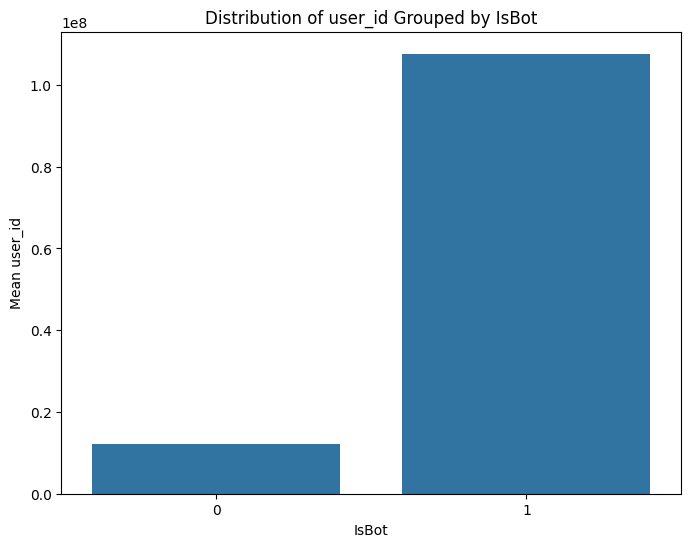

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Specify the attribute and the target column
attribute = 'user_id'
target = 'IsBot'

# Group the data by the target value and calculate the mean of the attribute
grouped_data = dataset_testing.groupby(target)[attribute].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target, y=attribute, data=grouped_data)
plt.title(f'Distribution of {attribute} Grouped by {target}')
plt.xlabel(target)
plt.ylabel(f'Mean {attribute}')
plt.show()


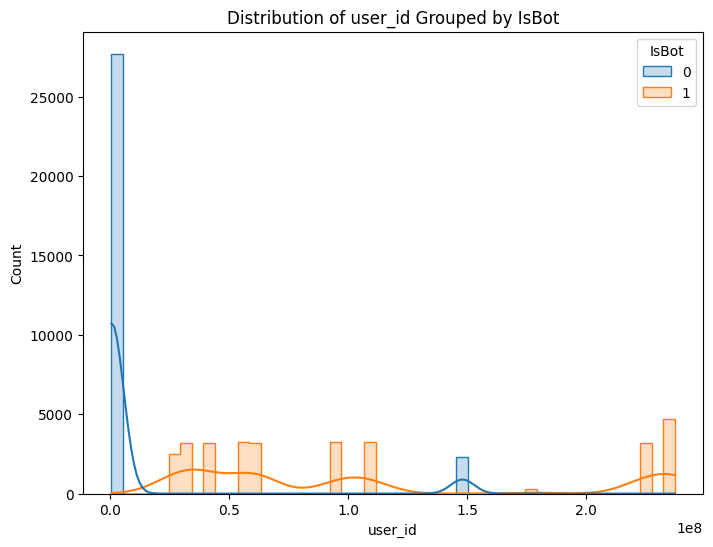

In [146]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset_testing, x=attribute, hue=target, element="step", kde=True)
plt.title(f'Distribution of {attribute} Grouped by {target}')
plt.xlabel(attribute)
plt.show()

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Dictionary to store accuracy for each feature
accuracy_dict = {}

# Iterate over each feature and perform logistic regression separately
for feature in dataset_testing.columns[:-1]:  # Exclude the target column
    X = dataset_testing[[feature]]
    y = dataset_testing['IsBot']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and fit logistic regression model
    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy in the dictionary
    accuracy_dict[feature] = accuracy

# Sort the dictionary by accuracy in descending order
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Print the ranking
print("Attribute Ranking based on Accuracy:")
for i, (feature, accuracy) in enumerate(sorted_accuracy, 1):
    print(f"{i}. {feature}: {accuracy}")


Attribute Ranking based on Accuracy:
1. user_id: 1.0
2. num_mentions: 0.7123333333333334
3. in_reply_to_user_id: 0.6575
4. in_reply_to_status_id: 0.6516666666666666
5. num_urls: 0.5908333333333333
6. retweeted_status_id: 0.5566666666666666
7. favorite_count: 0.5461666666666667
8. num_hashtags: 0.5304166666666666
9. retweet_count: 0.5275833333333333
10. reply_count: 0.49241666666666667


In [120]:
# Initialize the XGBoost model
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Access the underlying booster
booster = model.get_booster()

Accuracy: 1.0


In [119]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Get feature importances
feature_importances = booster.get_score(importance_type='weight')  # or 'gain', 'cover', 'total_gain', 'total_cover'

# Print feature importances
print("Feature importances:")
for feature, importance in feature_importances.items():
    print(f"Feature {feature}: Importance {importance}")

Feature importances:
Feature user_id: Importance 158.0
Feature num_urls: Importance 16.0


In [92]:
# Select the columns you want to keep
selected_columns = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

# Keep only the selected columns
dataset_selected = dataset[selected_columns + ['IsBot']]
first_row = dataset_selected.iloc[0]

print(first_row)

# Keep only the selected columns tweet text only
dataset_tweets = dataset[['text'] + ['IsBot']]
first_row = dataset_tweets.iloc[0]

print(first_row)

retweet_count     0.0
reply_count       0.0
favorite_count    0.0
num_hashtags      0.0
num_urls          1.0
num_mentions      0.0
IsBot             1.0
Name: 0, dtype: float64
text     I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws
IsBot                                                   1
Name: 0, dtype: object


The choice of limiting the size of the feature set is motivated by
two important reasons:

• Model efficiency: A reduced set of features yields very efficient models that can be trained faster and are less prone
to overfitting, which is a common issue in social media data
mining due to the presence of outliers.

• Interpretability: A limited set of features with an obvious
meaning, like the ones provided by account metadata, allows
to produce interpretable models. This is a very important
point, especially when combined with deep learning strategies that are notoriously hard to interpret.

In [41]:
# Separate features (X) and target variable (y)
X = dataset_selected.drop(columns=['IsBot'])  # Features
y = dataset_selected['IsBot']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Summarize information of the training dataset
print("Summary of training dataset:")
print("")
print(X_train.info())

Summary of training dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 48572 to 56422
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   retweet_count   48000 non-null  float64
 1   reply_count     48000 non-null  float64
 2   favorite_count  48000 non-null  float64
 3   num_hashtags    48000 non-null  float64
 4   num_urls        48000 non-null  float64
 5   num_mentions    48000 non-null  float64
dtypes: float64(6)
memory usage: 2.6 MB
None


In [48]:
# Initialize the XGBoost model
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Access the underlying booster
booster = model.get_booster()

Accuracy: 0.7300833333333333


In [128]:
# Initialize the KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=2)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7116666666666667


In [87]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Accuracy: 0.7178333333333333


In [85]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7234166666666667


In [86]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier()

# Train the model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7231666666666666


In [88]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Get feature importances
feature_importances = booster.get_score(importance_type='weight')  # or 'gain', 'cover', 'total_gain', 'total_cover'

# Print feature importances
print("Feature importances:")
for feature, importance in feature_importances.items():
    print(f"Feature {feature}: Importance {importance}")


Feature importances:
Feature retweet_count: Importance 896.0
Feature favorite_count: Importance 556.0
Feature num_hashtags: Importance 381.0
Feature num_urls: Importance 203.0
Feature num_mentions: Importance 345.0
